In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()


In [2]:
fires= pd.read_csv('fires.csv')
fires

C:\Users\Enedis\AppData\Local\Temp\ipykernel_5888\955333285.py:1: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,35,37,39,42) have mixed types. Specify dtype option on import or set low_memory=False.
  fires= pd.read_csv('fires.csv')


OBJECTID     FOD_ID             FPA_ID SOURCE_SYSTEM_TYPE  \
0               1          1         FS-1418826                FED   
1               2          2         FS-1418827                FED   
2               3          3         FS-1418835                FED   
3               4          4         FS-1418845                FED   
4               5          5         FS-1418847                FED   
...           ...        ...                ...                ...   
1880460   1880461  300348363  2015CAIRS29019636             NONFED   
1880461   1880462  300348373  2015CAIRS29217935             NONFED   
1880462   1880463  300348375  2015CAIRS28364460             NONFED   
1880463   1880464  300348377  2015CAIRS29218079             NONFED   
1880464   1880465  300348399  2015CAIRS26733926             NONFED   

        SOURCE_SYSTEM NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  \
0         FS-FIRESTAT                    FS                USCAPNF   
1         FS-FIRESTAT                    FS                USCAENF   
2         FS-FIRESTAT                    FS                USCAENF   
3         FS-FIRESTAT                    FS                USCAENF   
4         FS-FIRESTAT                    FS                USCAENF   
...               ...                   ...                    ...   
1880460      ST-CACDF                ST/C&L                USCASHU   
1880461      ST-CACDF                ST/C&L                USCATCU   
1880462      ST-CACDF                ST/C&L                USCATCU   
1880463      ST-CACDF                ST/C&L                USCATCU   
1880464      ST-CACDF                ST/C&L                USCABDU   

         NWCG_REPORTING_UNIT_NAME SOURCE_REPORTING_UNIT  \
0          Plumas National Forest                   511   
1        Eldorado National Forest                   503   
2        Eldorado National Forest                   503   
3        Eldorado National Forest                   503   
4        Eldorado National Forest                   503   
...                           ...                   ...   
1880460       Shasta-Trinity Unit                 CASHU   
1880461   Tuolumne-Calaveras Unit                 CATCU   
1880462   Tuolumne-Calaveras Unit                 CATCU   
1880463   Tuolumne-Calaveras Unit                 CATCU   
1880464       San Bernardino Unit                 CABDU   

        SOURCE_REPORTING_UNIT_NAME  ...        DATE CONT_DATE_COR  \
0           PLUMAS NATIONAL FOREST  ...  2005-02-02    2005-02-02   
1         ELDORADO NATIONAL FOREST  ...  2004-05-12    2004-05-12   
2         ELDORADO NATIONAL FOREST  ...  2004-05-31    2004-05-31   
3         ELDORADO NATIONAL FOREST  ...  2004-06-28    2004-07-03   
4         ELDORADO NATIONAL FOREST  ...  2004-06-28    2004-07-03   
...                            ...  ...         ...           ...   
1880460        SHASTA-TRINITY UNIT  ...  2015-09-26    2015-09-26   
1880461    TUOLUMNE-CALAVERAS UNIT  ...  2015-10-05           NaN   
1880462    TUOLUMNE-CALAVERAS UNIT  ...  2015-05-02           NaN   
1880463    TUOLUMNE-CALAVERAS UNIT  ...  2015-10-14           NaN   
1880464  CDF - SAN BERNARDINO UNIT  ...  2015-03-14           NaN   

        CONT_DATE_COR_INT DIFF_YEAR DURATION FIRE_SIZE_CLASS_TEST      MONTH  \
0                    2005         0   0 days                    A   February   
1                    2004         0   0 days                    A        May   
2                    2004         0   0 days                    A        May   
3                    2004         0   5 days                    A       June   
4                    2004         0   5 days                    A       June   
...                   ...       ...      ...                  ...        ...   
1880460              2015         0   0 days                    A  September   
1880461                 0     -2015      NaN                    A    October   
1880462                 0     -2015      NaN                    A    

In [3]:
# Création d'un dataframe pour la modélisation. On enlève à notre dataset de départ (fires) les variables qu'on juge inutiles pour n'importe quelle modélisation. 
fires_model = fires
print(fires_model.info())

# Vérification des données nulles
print(fires_model.isna().sum())


# Nous supprimons les ID, les colonnes avec beaucoup de valeurs manquantes, les colonnes DIFF_YEAR, CONT_DATE_COR et FIRE_SIZE_CLASS_TEST qui ont été créées pour vérifier 
# la conformité des données. Nous supprimons également les colonnes inutiles et les variables avec beaucoup de valeurs aberrantes telle que DURATION.
# Nous allons conserver les variables suivantes (on remplace MONTH par SPLIT_MONTH):
fires_model = fires[['STAT_CAUSE_DESCR','FIRE_SIZE_CLASS', 'STATE', 'DAY', 'FIRE_YEAR', 'DISCOVERY_DAY', 'LATITUDE', 'LONGITUDE', 'FIRE_SIZE', 'SPLIT_MONTH', 'SPLIT_DAY']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 48 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   FOD_ID                      int64  
 2   FPA_ID                      object 
 3   SOURCE_SYSTEM_TYPE          object 
 4   SOURCE_SYSTEM               object 
 5   NWCG_REPORTING_AGENCY       object 
 6   NWCG_REPORTING_UNIT_ID      object 
 7   NWCG_REPORTING_UNIT_NAME    object 
 8   SOURCE_REPORTING_UNIT       object 
 9   SOURCE_REPORTING_UNIT_NAME  object 
 10  LOCAL_FIRE_REPORT_ID        object 
 11  LOCAL_INCIDENT_ID           object 
 12  FIRE_CODE                   object 
 13  FIRE_NAME                   object 
 14  ICS_209_INCIDENT_NUMBER     object 
 15  ICS_209_NAME                object 
 16  MTBS_ID                     object 
 17  MTBS_FIRE_NAME              object 
 18  COMPLEX_NAME                object 
 19  FIRE_YEAR            

In [4]:
# Vérification des NaN
print(fires_model.isna().sum())

#Dimension du dataframe
fires_model.shape  #(1880465, 12)

STAT_CAUSE_DESCR    0
FIRE_SIZE_CLASS     0
STATE               0
DAY                 0
FIRE_YEAR           0
DISCOVERY_DAY       0
LATITUDE            0
LONGITUDE           0
FIRE_SIZE           0
SPLIT_MONTH         0
SPLIT_DAY           0
dtype: int64


(1880465, 11)

In [5]:
# Analyse du type de données afin de séparer les variables numériques et catégorielles
#fires_model.info()
print(fires_model.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   STAT_CAUSE_DESCR  object 
 1   FIRE_SIZE_CLASS   object 
 2   STATE             object 
 3   DAY               object 
 4   FIRE_YEAR         int64  
 5   DISCOVERY_DAY     int64  
 6   LATITUDE          float64
 7   LONGITUDE         float64
 8   FIRE_SIZE         float64
 9   SPLIT_MONTH       int64  
 10  SPLIT_DAY         int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 157.8+ MB
None


In [6]:
# Variables catégorielles
cat_var = fires_model.select_dtypes(include=[object])
print(cat_var.shape)

# Variables numériques
num_var = fires_model.select_dtypes(include=[np.number])
print(num_var.shape)

# Vérification de la non perte de données
print(fires_model.shape)
print('Les dimensions sont conformes, aucune perte de données')

(1880465, 4)
(1880465, 7)
(1880465, 11)
Les dimensions sont conformes, aucune perte de données


Variables catégorielles

In [7]:
# Etude des variables catégorielles
cat_var.nunique()

STAT_CAUSE_DESCR    13
FIRE_SIZE_CLASS      7
STATE               52
DAY                  7
dtype: int64

In [8]:
# Regroupement de la variable catégorielle STAT_CAUSE_DESCR par type de cause et remplacement numérique

def change_cause(cat):
    cause = 0
    natural_cause = ['Lightning']
    accidental_cause = ['Structure','Fireworks','Powerline','Railroad','Smoking','Children','Campfire','Equipment Use','Debris Burning']
    criminal_cause = ['Arson']
    other_cause = ['Missing/Undefined','Miscellaneous']
    if cat in natural_cause:
        cause = 1
    elif cat in accidental_cause:
        cause = 2
    elif cat in criminal_cause:
        cause = 3
    else:
        cause = 4
    return cause
     

cat_var['CAUSE'] = cat_var['STAT_CAUSE_DESCR'].apply(lambda x: change_cause(x))
cat_var = cat_var.drop('STAT_CAUSE_DESCR',axis=1)
cat_var.head()

FIRE_SIZE_CLASS STATE        DAY  CAUSE
0               A    CA  Wednesday      4
1               A    CA  Wednesday      1
2               A    CA     Monday      2
3               A    CA     Monday      1
4               A    CA     Monday      1

In [9]:
# Import
from sklearn.preprocessing import LabelEncoder

# Instanciation
le = LabelEncoder()

# Encodage de la variable catégorielle FIRE_SIZE_CLASS
cat_var['FIRE_SIZE_CLASS'] = le.fit_transform(cat_var['FIRE_SIZE_CLASS'])

# Encodage de la variable catégorielle FIRE_SIZE_CLASS
cat_var['STATE'] = le.fit_transform(cat_var['STATE'])

# Encodage de la variable catégorielle DAY
cat_var['DAY'] = le.fit_transform(cat_var['DAY'])

In [10]:
# Reconstitution du DataFrame et renommage des colonnes
fires_model = pd.concat([cat_var, num_var], axis=1)
fires_model = fires_model.rename(columns={'SPLIT_DAY':'DAY_OF_MONTH', 'SPLIT_MONTH':'MONTH'})

Vérification outliers sur variables numériques

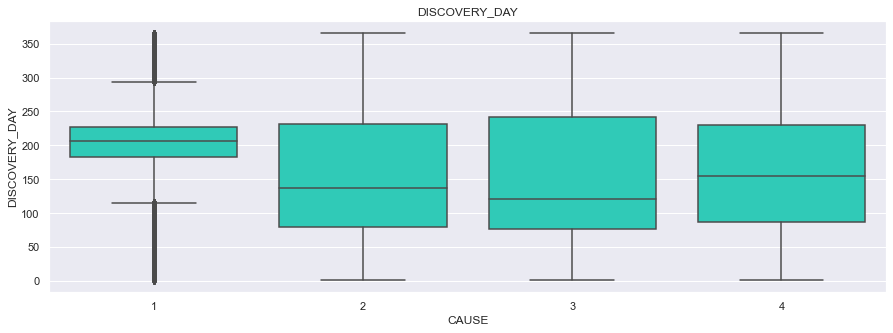

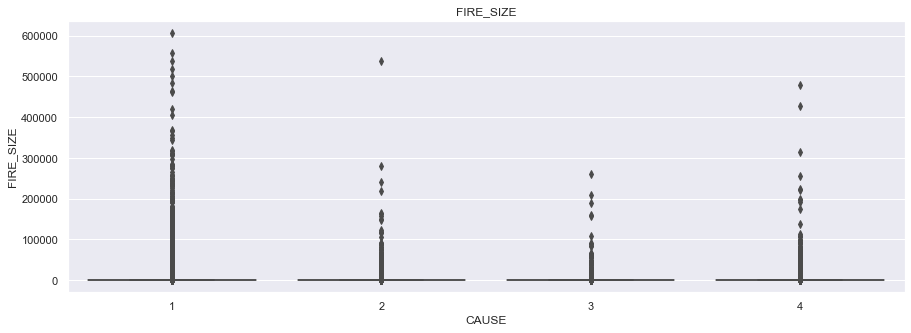

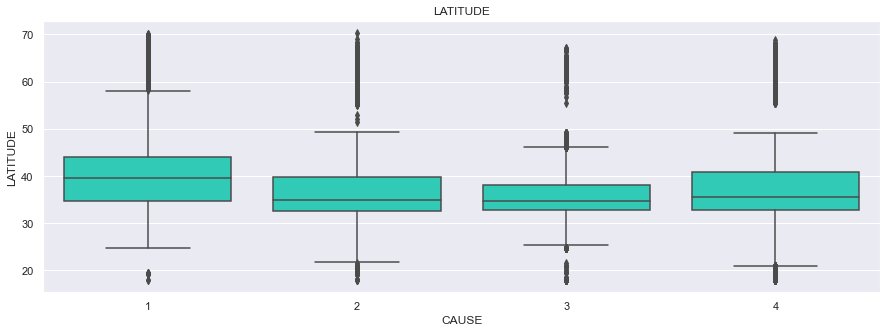

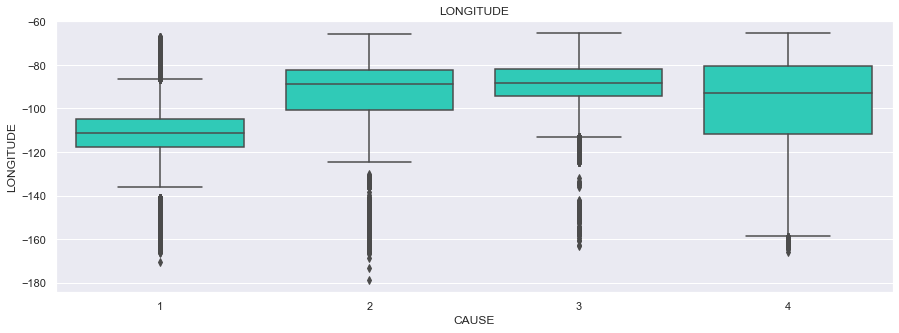

In [11]:
#En statistique, une valeur aberrante (ou outlier en anglais) est une observation qui est "distante" des autres valeurs de la même variable, c'est-à-dire qu'elle contraste grandement avec le reste des valeurs mesurées.
#Une valeur aberrante peut être due à une variabilité inhérente au phénomène observé ou peut aussi indiquer une erreur expérimentale.
#C'est pourquoi elles sont parfois exclues des données.

Col = ['DISCOVERY_DAY', 'FIRE_SIZE', 'LATITUDE', 'LONGITUDE']

for i in Col:
    fig, axs = plt.subplots(1, 1, figsize=(15, 5))
    sns.boxplot(y=fires_model[i], x=fires_model['CAUSE'], ax=axs, color='#16E4CA')
    plt.title(i)

In [12]:
print('LATITUTE ET LONGITUTE: cela peut varier considerablement, aucun changement ou supression des données')

print('DISCOVERY_DAY: cela reste entre 0 et 365 jours, donc c est cohérent')
print('\n')
print('Par contre on voit des outlier marquants sur FIRE_SIZE')
      
print('Quantité outliers FIRE_SIZE:' , fires_model['FIRE_SIZE'][fires_model['FIRE_SIZE']>400000].shape, 'vs', fires_model['FIRE_SIZE'].shape, 'en total')


LATITUTE ET LONGITUTE: cela peut varier considerablement, aucun changement ou supression des données
DISCOVERY_DAY: cela reste entre 0 et 365 jours, donc c est cohérent


Par contre on voit des outlier marquants sur FIRE_SIZE
Quantité outliers FIRE_SIZE: (13,) vs (1880465,) en total


In [13]:
#supression outliers FIRE_SIZE

fires_model = fires_model[fires_model['FIRE_SIZE']<400000]

fires_model.shape

(1880452, 11)

# PCA

In [14]:
# Import des packages
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [15]:
# Séparation des données d'entrainement et des données cibles
data = fires_model.drop(['CAUSE'], axis=1)
target = fires_model['CAUSE']

In [16]:
# Création instance StandardScaler
scaler = StandardScaler()
# Normalisation des données
norm = scaler.fit_transform(data)

# Création de l'instance PCA
model_pca = PCA()

# Stockage de la représentation de data normalisée obtenue par Analyse en Composantes Principales dans un array nommé coord_acp
coord_acp = model_pca.fit_transform(norm)

In [17]:
# Part de variance expliquée pour chaque composante
var_expl = model_pca.explained_variance_
print(var_expl)

[2.22416435e+00 1.22516763e+00 1.17598720e+00 1.15017663e+00
 1.00593396e+00 9.97590552e-01 9.51894918e-01 7.68687716e-01
 5.00369191e-01 3.31706208e-05]


In [18]:
# Dimension de la variance expliquée
var_expl.shape

(10,)

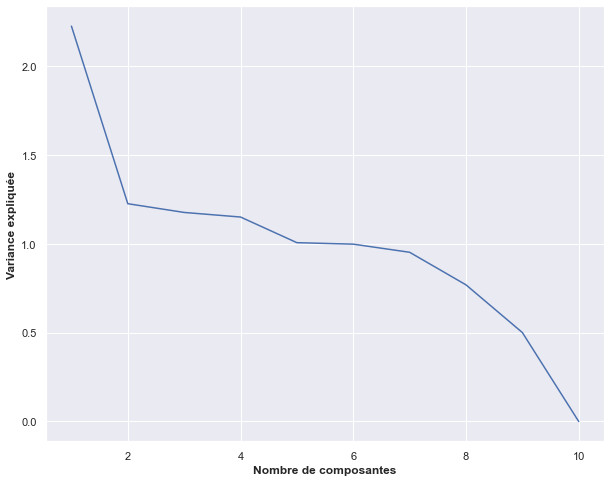

In [19]:
# Graphique de la variance expliquée en fonction du nombre de facteurs
plt.figure(figsize=(10,8))
plt.plot(np.arange(1,11), var_expl)
plt.xlabel('Nombre de composantes', weight='bold') # Nombre de facteurs
plt.ylabel('Variance expliquée', weight='bold') # Valeurs propres
plt.show()

In [20]:
# Ratio de la variance expliquée pour chacune des composantes
ratio_var = model_pca.explained_variance_ratio_ 
ratio_var

array([2.22416317e-01, 1.22516698e-01, 1.17598657e-01, 1.15017601e-01,
       1.00593343e-01, 9.97590022e-02, 9.51894412e-02, 7.68687307e-02,
       5.00368925e-02, 3.31706032e-06])

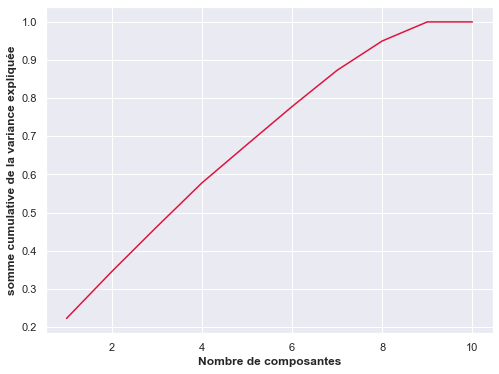

In [21]:
# Graphique de la somme cumulative représentant le ratio de la variance expliquée en fonction du nombre de composantes
plt.figure(figsize=(8,6))

plt.plot(np.arange(1, 11), np.cumsum(ratio_var), color = 'crimson')

plt.xlabel('Nombre de composantes', weight='bold') # Nombre de facteurs
plt.ylabel('somme cumulative de la variance expliquée', weight='bold')

plt.show()

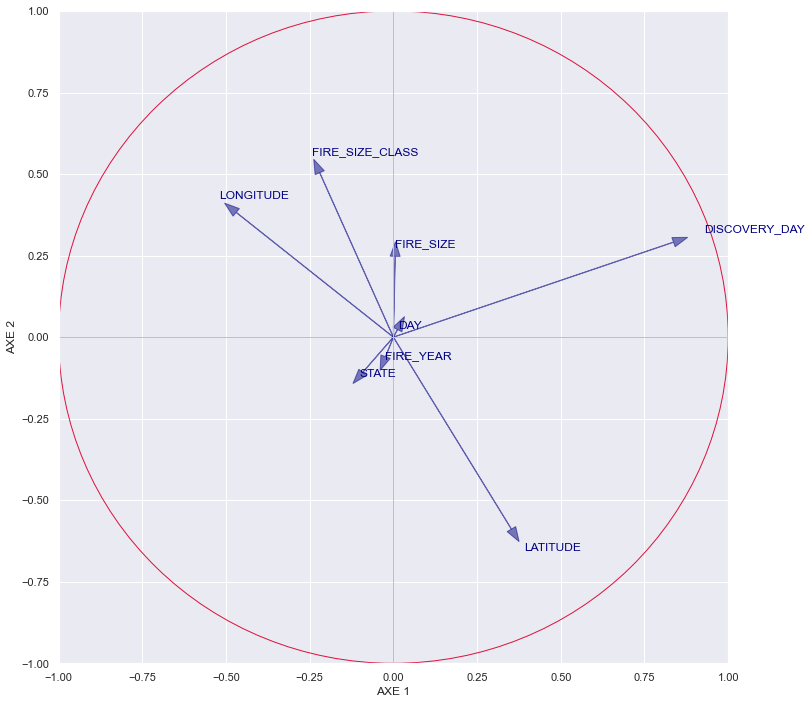

In [22]:
sqrt_eigval = np.sqrt(model_pca.explained_variance_)
corvar = np.zeros((10, 10))
for k in range(10):
    corvar[:, k] = model_pca.components_[k, :] * sqrt_eigval[k]
# corvar

fig, axes = plt.subplots(figsize=(12, 12))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# affichage des étiquettes (noms des variables)
for j in range(8):
    plt.annotate(data.columns[j], (corvar[j, 0], corvar[j, 1]), color='navy')
    plt.arrow(0, 0, corvar[j, 0]*0.9, corvar[j, 1]*0.9, alpha=0.5, head_width=0.03, color='navy')

# ajouter les axes
plt.plot([-1, 1], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1], color='silver', linestyle='-', linewidth=1)

cercle = plt.Circle((0, 0), 1, color='crimson', fill=False)
axes.add_artist(cercle)
plt.xlabel('AXE 1')
plt.ylabel('AXE 2')
plt.show()

In [23]:
# Création d'un dataframe avec uniquement les 2 premières coordonnées de PCA
acp_data = pd.DataFrame({'axe1':coord_acp[:,0], 'axe2':coord_acp[:,1], 'target':target})

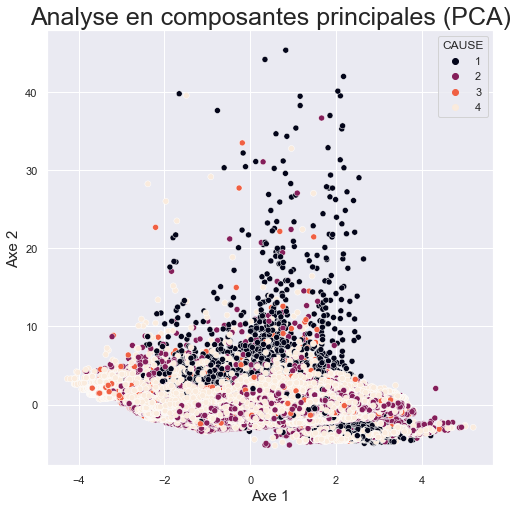

In [24]:
# Représentation graphique du nuage de points
plt.figure(figsize=(8,8))

sns.scatterplot(x='axe1', y='axe2', hue= target, data=acp_data, palette='rocket')

plt.title('Analyse en composantes principales (PCA)', fontsize=25)
plt.xlabel('Axe 1', fontsize=15)
plt.ylabel('Axe 2', fontsize=15)

plt.show()

# T-SNE

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
# L'objectif de T-SNE est similaire à celui de l'ACP : représenter nos données dans une dimension plus petite.
# Cependant, le principe de T-SNE est différent :
# Il construit une nouvelle représentation des données de manière à ce que les données proches dans la dimension d'origine aient une forte probabilité d'avoir des représentations proches dans la nouvelle dimension.

from sklearn.manifold import TSNE

In [27]:
# Création de l'instance T-SNE
tsne = TSNE(n_components=2)

# Import de la fonction random pour pouvoir sélectionner aléatoirement 100000 données du dataset normalisé
import random
norm_aleatoire = random.choices(norm, k=100000)
# Stockage de la représentation de data normalisée avec 10% des données intiales aléatoires afin de ne pas trop bloquer le lancement
# Pour mémoire : time 12 à 24min.
Coord_TSNE = tsne.fit_transform(norm_aleatoire)


In [28]:
# DataFrame tsne_df contenant les coordonnées Coord_TSNE ainsi que la variable target avec 10% des données initiales.

tsne_df = pd.DataFrame({'AXE 1': Coord_TSNE[:, 0], 'AXE 2': Coord_TSNE[:, 1], 'Target': target[100000]})

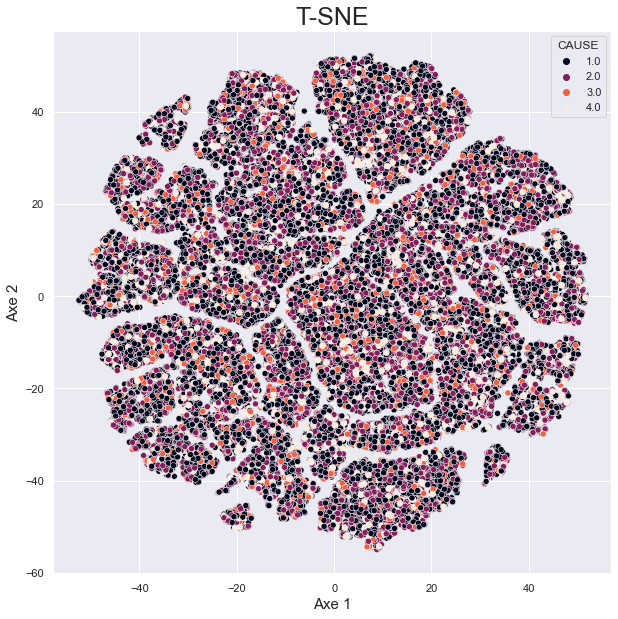

In [29]:
# Représentation graphique de 10% des données

plt.figure(figsize=(10,10))

sns.scatterplot(x='AXE 1', y='AXE 2', hue= target, data=tsne_df, palette='rocket')

plt.title('T-SNE', fontsize=25)
plt.xlabel('Axe 1', fontsize=15)
plt.ylabel('Axe 2', fontsize=15)

plt.show()

### T-SNE + PCA

In [30]:
# Création d'une nouvelle isntance de TSNE
tsne_new = TSNE(n_components=2)

# Stockage des coordonnées du T-SNE sur celles de l'ACP avec 10% des données
# Pour mémoire : time > 13 min. 
coord_acp_aleatoire = random.choices(coord_acp, k=100000)
Coord_TSNE_ACP = tsne_new.fit_transform(coord_acp_aleatoire)

In [31]:
# Création d'un nouveau DataFrame tsne_acp_df contenant Coord_TSNE_ACP et la variable target
tsne_acp_df = pd.DataFrame({'AXE 1': Coord_TSNE_ACP[:, 0], 'AXE 2': Coord_TSNE_ACP[:, 1], 'Target': target[:100000]})

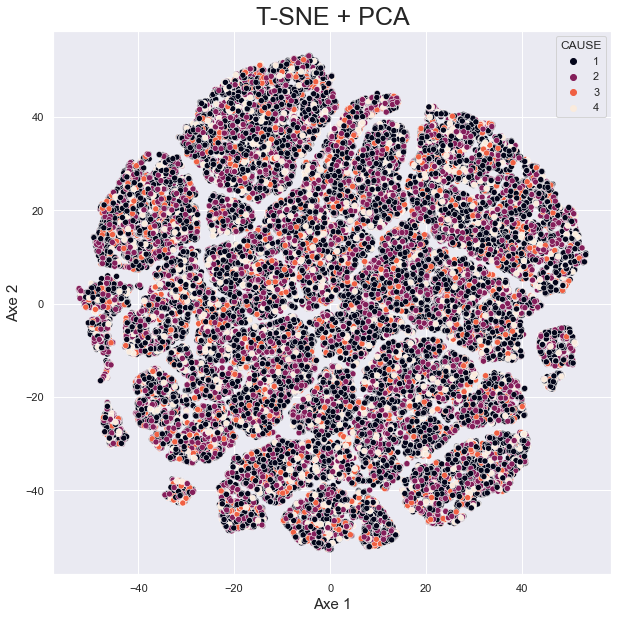

In [32]:
# Représentation graphique
plt.figure(figsize=(10,10))

sns.scatterplot(x='AXE 1', y='AXE 2', hue= target, data=tsne_acp_df, palette='rocket')

plt.title('T-SNE + PCA', fontsize=25)
plt.xlabel('Axe 1', fontsize=15)
plt.ylabel('Axe 2', fontsize=15)

plt.show()

## K-MEANS

In [33]:
# import
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Conserver toutes les variables normalisées y compris Alaska, Hawai et Puerto Rico

fires_model_for_kmeans = fires_model[['LONGITUDE', 'LATITUDE', 'FIRE_SIZE_CLASS']]

# Standardisation des données
sc = StandardScaler()
fires_model_norm = sc.fit_transform(fires_model_for_kmeans)

In [34]:
fires_model_norm_kmeans = pd.DataFrame(fires_model_norm, columns=['LONGITUDE','LATITUDE','FIRE_SIZE_CLASS'])
fires_model_norm_kmeans

LONGITUDE  LATITUDE  FIRE_SIZE_CLASS
0        -1.513530  0.530371        -1.012636
1        -1.477555  0.350549        -1.012636
2        -1.497362  0.358875        -1.012636
3        -1.448176  0.289643        -1.012636
4        -1.449356  0.289643        -1.012636
...            ...       ...              ...
1880447  -1.596295  0.602810        -1.012636
1880448  -1.509507  0.136267        -1.012636
1880449  -1.509507  0.136267        -1.012636
1880450  -1.507101  0.145164         0.190484
1880451  -1.263786 -0.410159        -1.012636

[1880452 rows x 3 columns]

In [35]:
# Création de l'instance KMeans
kmeans = KMeans(n_clusters=2)

# Ajustement 
kmeans.fit(fires_model_norm_kmeans)

# Prédictions
y_kmeans = kmeans.predict(fires_model_norm_kmeans)

In [36]:
# vecteur qui contient le numéro du groupe de chacune des données
labels = kmeans.labels_ 
labels


array([0, 0, 0, ..., 0, 0, 0])

In [37]:
# Coordonnées des clusters / liste des positions des K centroïdes
centroids = kmeans.cluster_centers_
centroids

array([[-1.05279123,  0.70549603, -0.39694418],
       [ 0.61145721, -0.40974945,  0.2305437 ]])

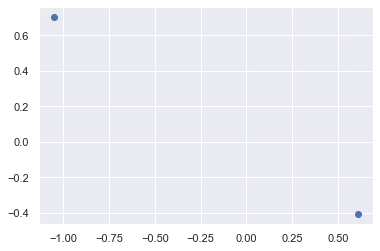

In [38]:
# Graphique des centroïdes
plt.scatter(centroids[:, 0],centroids[:, 1])
plt.show()

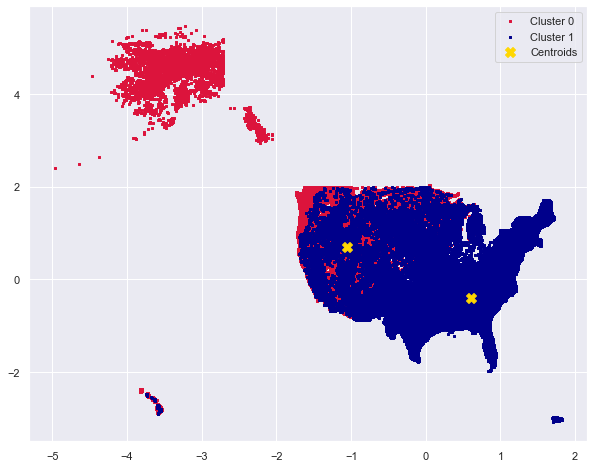

In [39]:
plt.figure(figsize=(10, 8))

plt.scatter(fires_model_norm_kmeans[y_kmeans==0].iloc[:,0], fires_model_norm_kmeans[y_kmeans==0].iloc[:,1],
            s=5, c='crimson', label='Cluster 0', marker=',')

plt.scatter(fires_model_norm_kmeans[y_kmeans==1].iloc[:,0], fires_model_norm_kmeans[y_kmeans==1].iloc[:,1],
            s=5, c='darkblue', label='Cluster 1', marker=',')


plt.scatter(centroids[:, 0],centroids[:, 1], s=100, c='gold', label='Centroids', marker='X')

plt.legend(loc='best')

plt.show()

### Choix du nombre de clusters optimal méthode 1

In [61]:
# Import de la fonction permettant de calculer la distance entre les observations de dimension quelconque
from scipy.spatial.distance import cdist

# Pour mémoire, time > 15 min pour (2,20) et > 176min pour (1,60).
# Liste de k à tester
list_n_clusters = list(range(1,60))

# Initialisation de la liste de distorsions
distorsions = []
# Calcul des distorsions pour les différents modèles
for n_clusters in list_n_clusters :
    # Initialisation d'un cluster ayant un pour nombre de clusters n_clusters
    cluster = KMeans(n_clusters = n_clusters)
    # Apprentissage des données suivant le cluster construit ci-dessus
    cluster.fit(fires_model_norm_kmeans)
    # Ajout de la nouvelle distorsion à la liste des données
    distorsions.append(sum(np.min(cdist(fires_model_norm_kmeans, cluster.cluster_centers_, 'euclidean'), axis=1)) / np.size(fires_model_norm_kmeans, axis = 0))


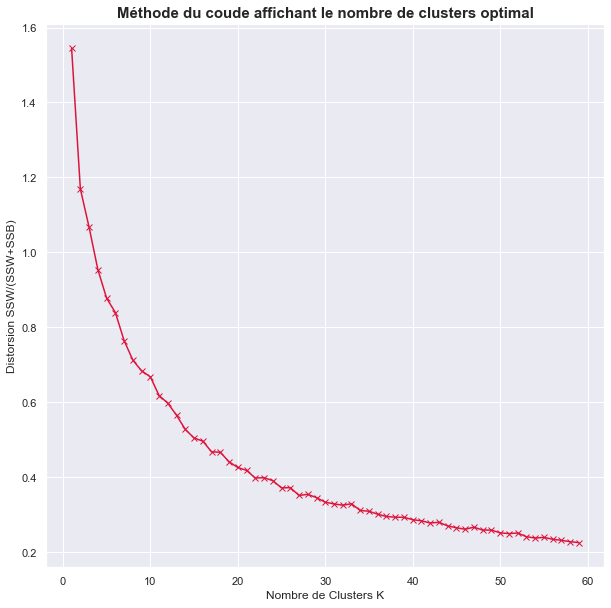

In [62]:
# Représentation grahpique des distorsions en fonction du nombre de clusters
plt.figure(figsize=(10,10))

plt.plot(list_n_clusters, distorsions, marker='x', c='crimson')

plt.xlabel('Nombre de Clusters K')
plt.ylabel('Distorsion SSW/(SSW+SSB)')
plt.title('Méthode du coude affichant le nombre de clusters optimal', fontsize=15, weight='semibold')

plt.show()

Nous voyons clairement qu'il n'y a pas de coude dans la courbe et il est donc difficle de repérer le k optimal. Le k optimal peut être de 5 comme de 10 ou 20.

### Choix du nombre de clusters optimal méthode 2

Text(0, 0.5, 'K-Means inertia')

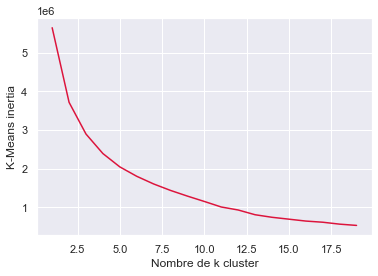

In [67]:
# Cette méthode consiste à tracer la variation expliquée en fonction du nombre de clusters, 
# et à choisir le coude de la courbe comme le nombre de clusters à utiliser
# Pour mémoire : time > 15min.
L = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(fires_model_norm_kmeans)
    L.append(kmeans.inertia_)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 20), L, c='crimson')
plt.xlabel('Nombre de k cluster')
plt.ylabel('K-Means inertia')

### Test du nombre de variables et de clusters à prendre en compte dans le modèle

In [63]:
fires_k_model = fires_model[['FIRE_SIZE_CLASS', 'STATE', 'DAY', 'CAUSE', 'FIRE_YEAR',
       'DISCOVERY_DAY', 'FIRE_SIZE', 'MONTH', 'DAY_OF_MONTH']]

### K-Means avec 2 clusters et 3 variables

In [64]:
# Conserver toutes les variables normalisées y compris Alaska, Hawai et Puerto Rico

# Fonction pour tester les colonnes du DF
def model_kmeans0(dataframe) :
    for col in fires_k_model :
        fires_model_for_kmeans0 = fires_model[['LONGITUDE', 'LATITUDE', col]]

        # Standardisation des données
        sc = StandardScaler()
        fires_model_norm0 = sc.fit_transform(fires_model_for_kmeans0)

        # Création DF
        fires_model_norm_kmeans0 = pd.DataFrame(fires_model_norm0, columns=['LONGITUDE','LATITUDE',col])

        # Création de l'instance KMeans
        kmeans0 = KMeans(n_clusters=2)
        kmeans0.fit(fires_model_norm_kmeans0)
        y_kmeans0 = kmeans0.predict(fires_model_norm_kmeans0)

        # vecteur qui contient le numéro du groupe de chacune des données
        labels0 = kmeans0.labels_ 

        # Coordonnées des clusters / liste des positions des K centroïdes
        centroids0 = kmeans0.cluster_centers_

        # Graphique des centroïdes
        plt.scatter(centroids0[:, 0],centroids0[:, 1])
        plt.title(col)
        plt.show()

        # Représentation graphique K-means
        plt.figure(figsize=(15, 10))

        plt.scatter(fires_model_norm_kmeans0[y_kmeans0==0].iloc[:,0], fires_model_norm_kmeans0[y_kmeans0==0].iloc[:,1], s=5, alpha=0.5, c='#0450B4', label='Cluster 0')

        plt.scatter(fires_model_norm_kmeans0[y_kmeans0==1].iloc[:,0], fires_model_norm_kmeans0[y_kmeans0==1].iloc[:,1], s=5, alpha=0.5, c='#FEA802', label='Cluster 1')
        

        plt.scatter(centroids0[:, 0],centroids0[:, 1], s=100, c='black', label='Centroids', marker='X')

        plt.legend(loc='best', markerscale=2)
        plt.show()




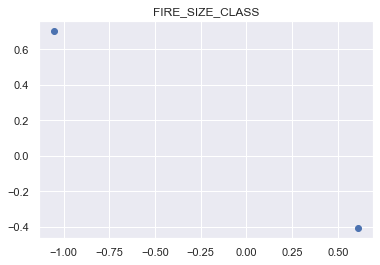

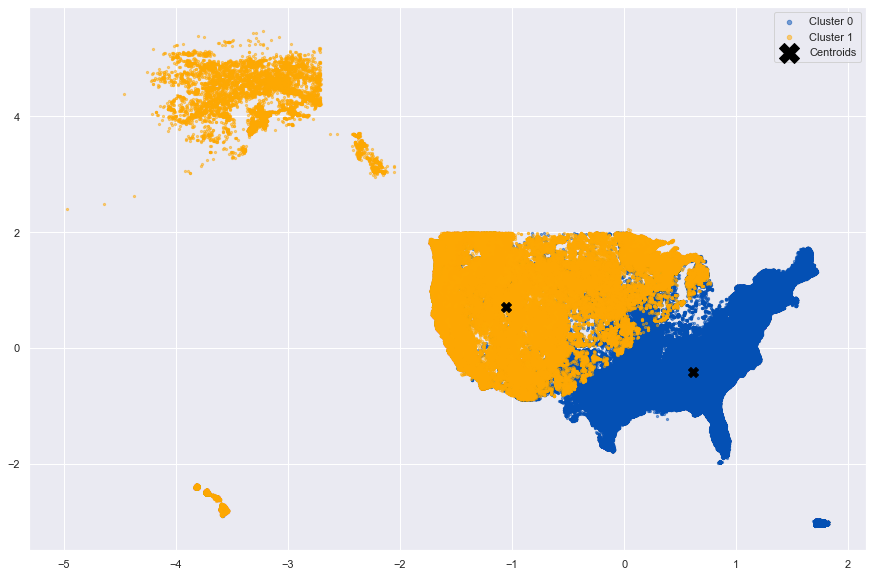

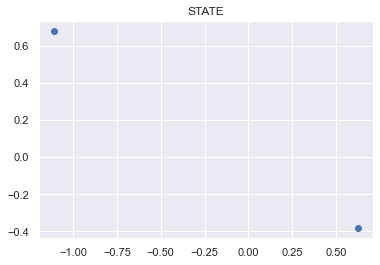

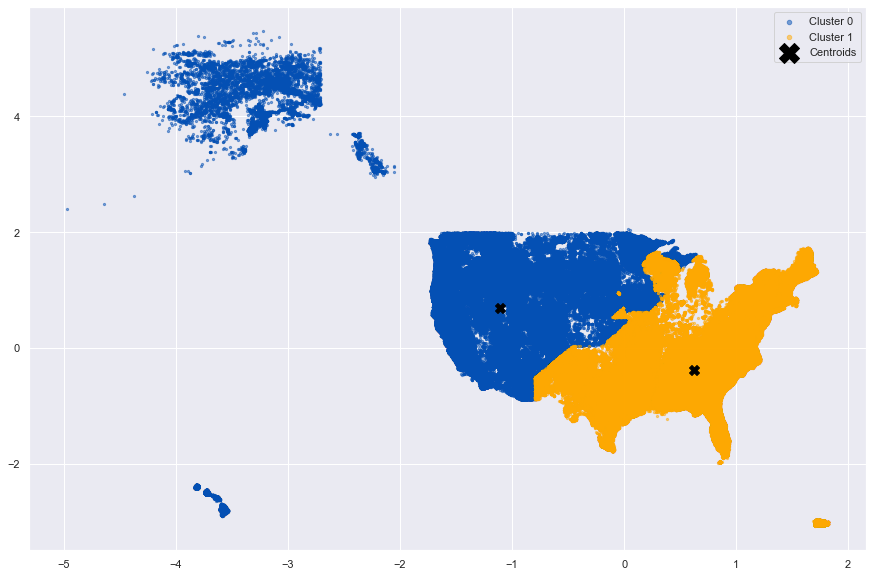

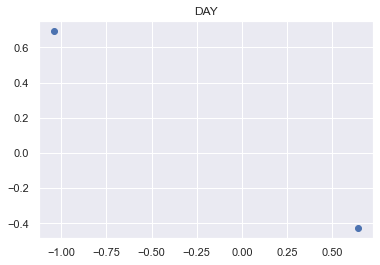

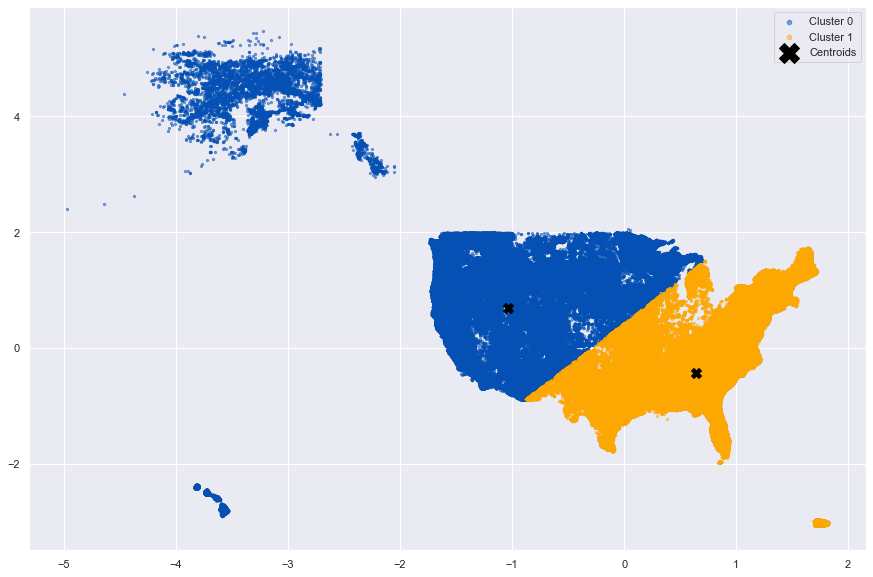

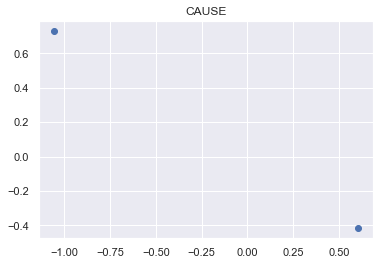

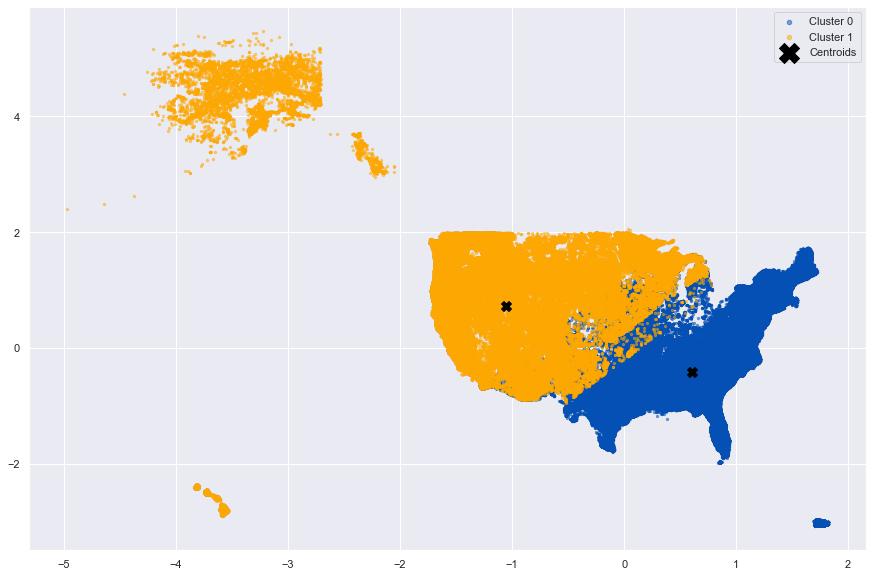

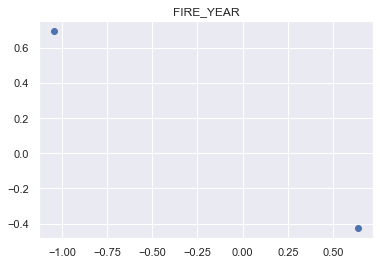

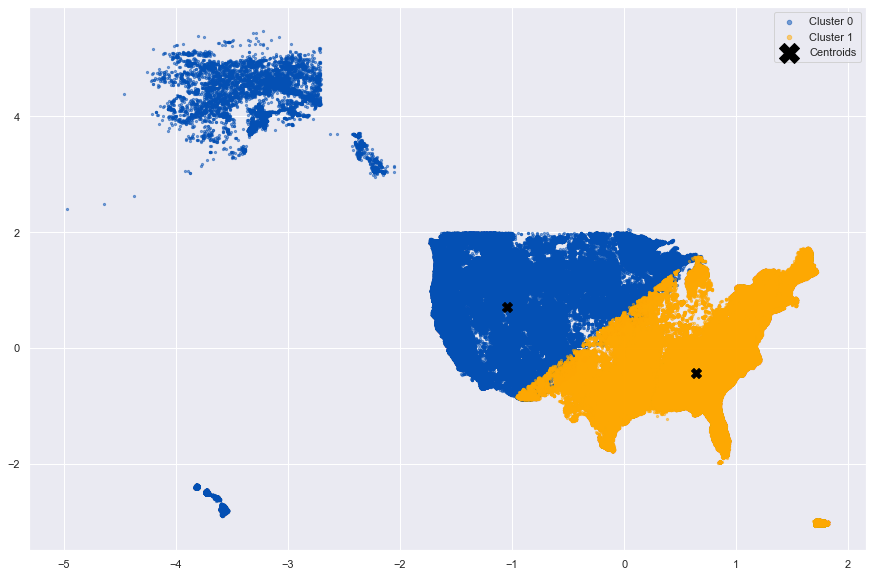

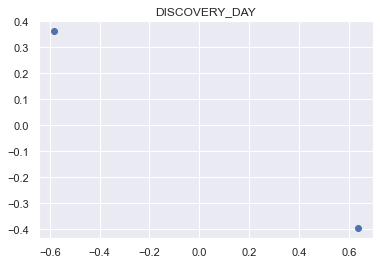

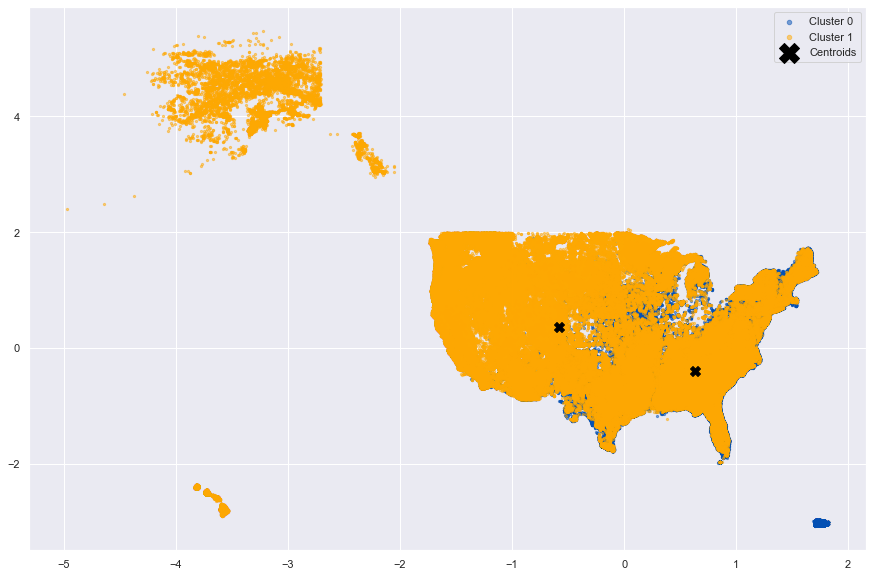

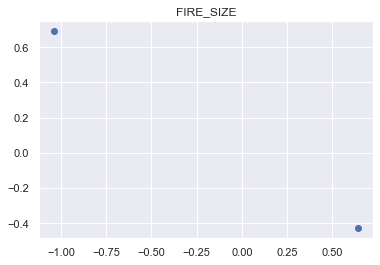

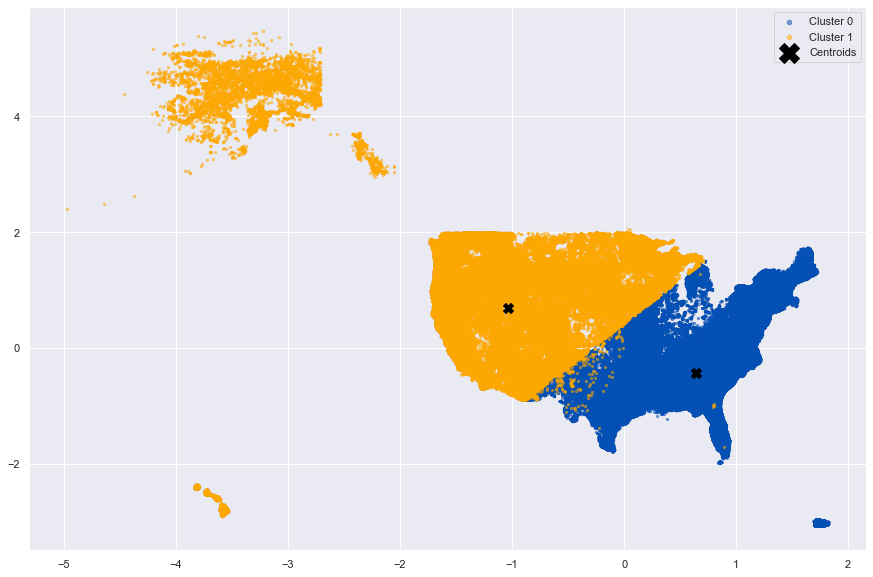

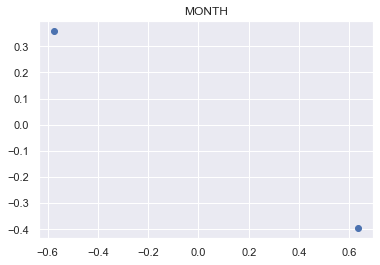

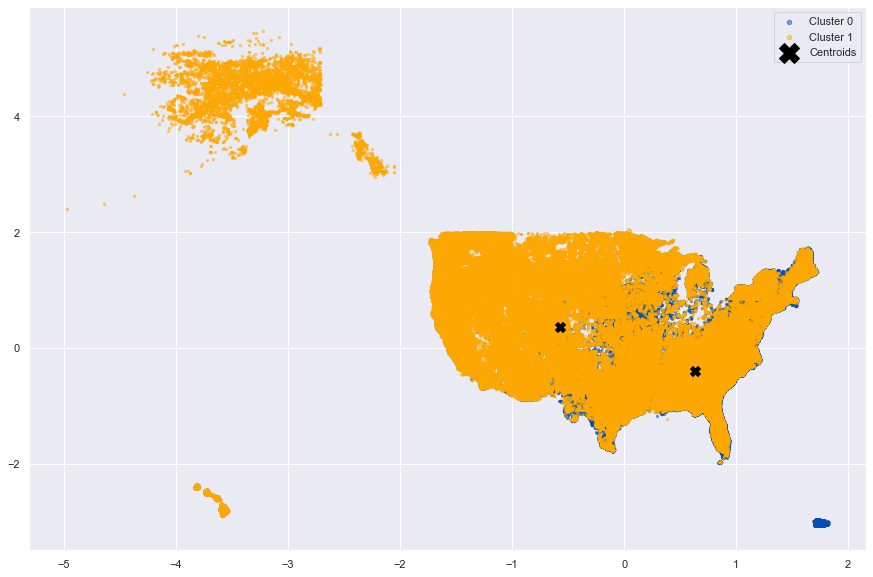

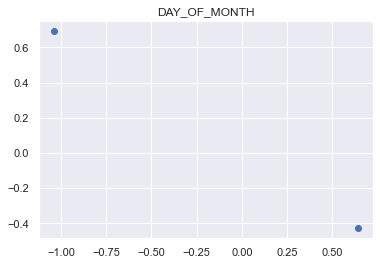

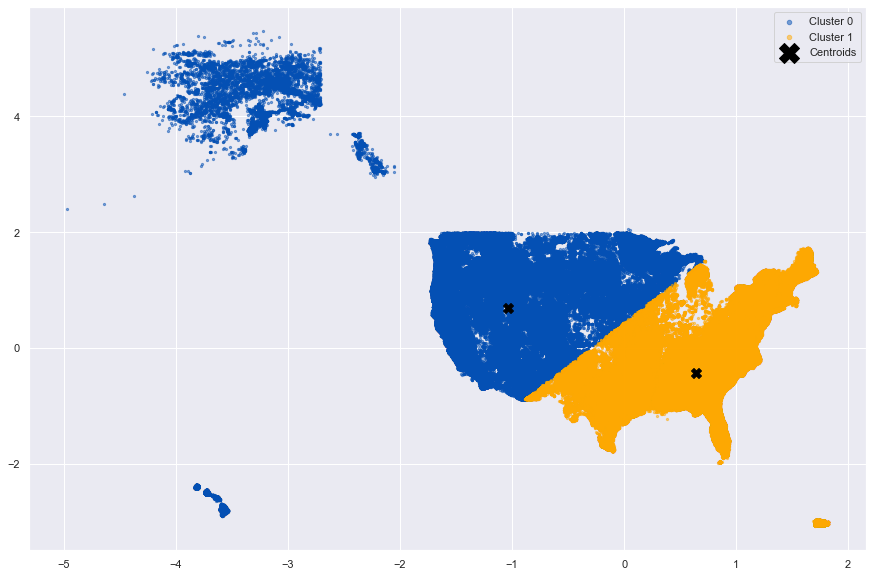

In [ ]:
# Pour mémoire : time > 5min.
model_kmeans0(fires_k_model.columns)

### K-Means avec 10 clusters et 3 variables

In [ ]:
# Conserver toutes les variables normalisées y compris Alaska, Hawai et Puerto Rico

# Fonction pour tester les colonnes du DF
def model_kmeans2(dataframe) :
    for col in fires_k_model :
        fires_model_for_kmeans2 = fires_model[['LONGITUDE', 'LATITUDE', col]]

        # Standardisation des données
        sc = StandardScaler()
        fires_model_norm2 = sc.fit_transform(fires_model_for_kmeans2)

        # Création DF
        fires_model_norm_kmeans2 = pd.DataFrame(fires_model_norm2, columns=['LONGITUDE','LATITUDE',col])

        # Création de l'instance KMeans
        kmeans2 = KMeans(n_clusters=10)
        kmeans2.fit(fires_model_norm_kmeans2)
        y_kmeans2 = kmeans2.predict(fires_model_norm_kmeans2)

        # vecteur qui contient le numéro du groupe de chacune des données
        labels2 = kmeans2.labels_ 

        # Coordonnées des clusters / liste des positions des K centroïdes
        centroids2 = kmeans2.cluster_centers_

        # Graphique des centroïdes
        plt.scatter(centroids2[:, 0],centroids2[:, 1])
        plt.title(col)
        plt.show()

        # Représentation graphique K-means
        plt.figure(figsize=(15, 10))

        plt.scatter(fires_model_norm_kmeans2[y_kmeans2==0].iloc[:,0], fires_model_norm_kmeans2[y_kmeans2==0].iloc[:,1],
                s=5, alpha=0.5, c='#0450B4', label='Cluster 0')

        plt.scatter(fires_model_norm_kmeans2[y_kmeans2==1].iloc[:,0], fires_model_norm_kmeans2[y_kmeans2==1].iloc[:,1],
                s=5, alpha=0.5, c='#FEA802', label='Cluster 1')
        
        plt.scatter(fires_model_norm_kmeans2[y_kmeans2==2].iloc[:,0], fires_model_norm_kmeans2[y_kmeans2==2].iloc[:,1],
                s=5, alpha=0.5, c='#15A2A2', label='Cluster 2')

        plt.scatter(fires_model_norm_kmeans2[y_kmeans2==3].iloc[:,0], fires_model_norm_kmeans2[y_kmeans2==3].iloc[:,1],
                s=5, alpha=0.5, c='#FE7434', label='Cluster 3')

        plt.scatter(fires_model_norm_kmeans2[y_kmeans2==4].iloc[:,0], fires_model_norm_kmeans2[y_kmeans2==4].iloc[:,1],
                s=5, alpha=0.5, c='#6FB1A0', label='Cluster 4')

        plt.scatter(fires_model_norm_kmeans2[y_kmeans2==5].iloc[:,0], fires_model_norm_kmeans2[y_kmeans2==5].iloc[:,1],
                s=5, alpha=0.5, c='#B4418E', label='Cluster 5')

        plt.scatter(fires_model_norm_kmeans2[y_kmeans2==6].iloc[:,0], fires_model_norm_kmeans2[y_kmeans2==6].iloc[:,1],
                s=5, alpha=0.5, c='#EA515F', label='Cluster 6')
        
        plt.scatter(fires_model_norm_kmeans2[y_kmeans2==7].iloc[:,0], fires_model_norm_kmeans2[y_kmeans2==7].iloc[:,1],
                s=5, alpha=0.5, c='#046DC8', label='Cluster 7')

        plt.scatter(fires_model_norm_kmeans2[y_kmeans2==8].iloc[:,0], fires_model_norm_kmeans2[y_kmeans2==8].iloc[:,1],
                s=5, alpha=0.5, c='#0C5A5A', label='Cluster 8')

        plt.scatter(fires_model_norm_kmeans2[y_kmeans2==9].iloc[:,0], fires_model_norm_kmeans2[y_kmeans2==9].iloc[:,1],
                s=5, alpha=0.5, c='#D94A8C', label='Cluster 9')


        plt.scatter(centroids2[:, 0],centroids2[:, 1], s=100, c='black', label='Centroids', marker='X')

        plt.legend(loc='best')
        plt.show()




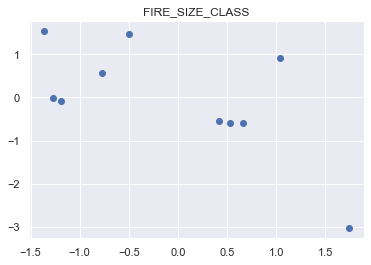

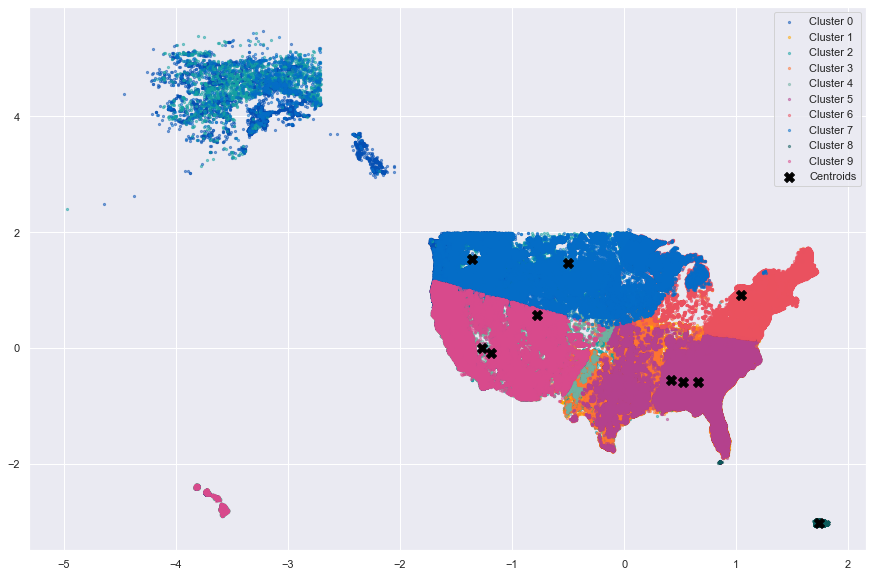

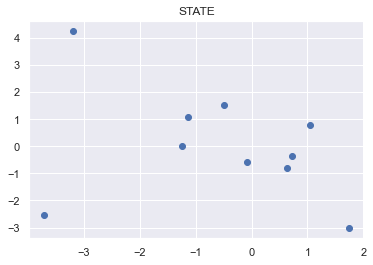

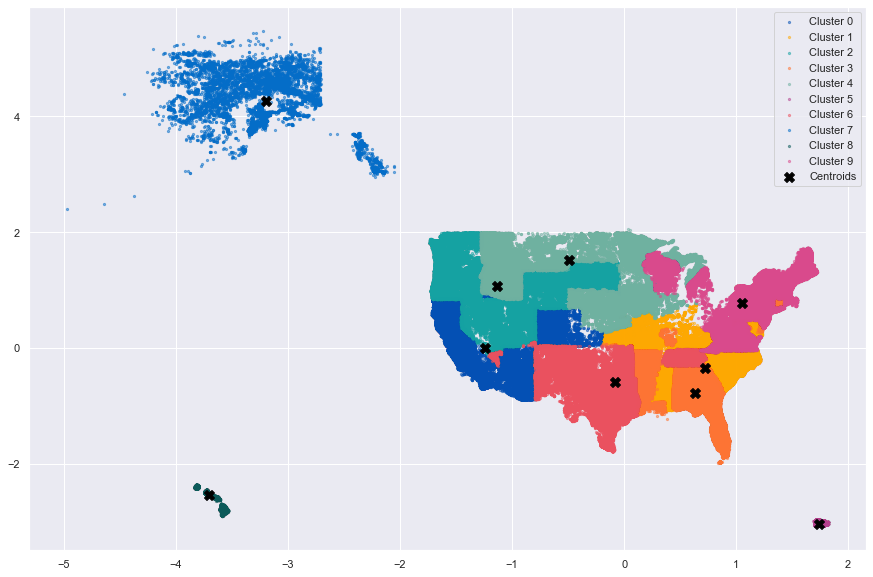

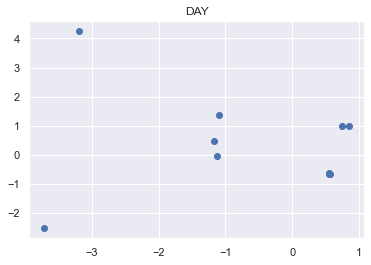

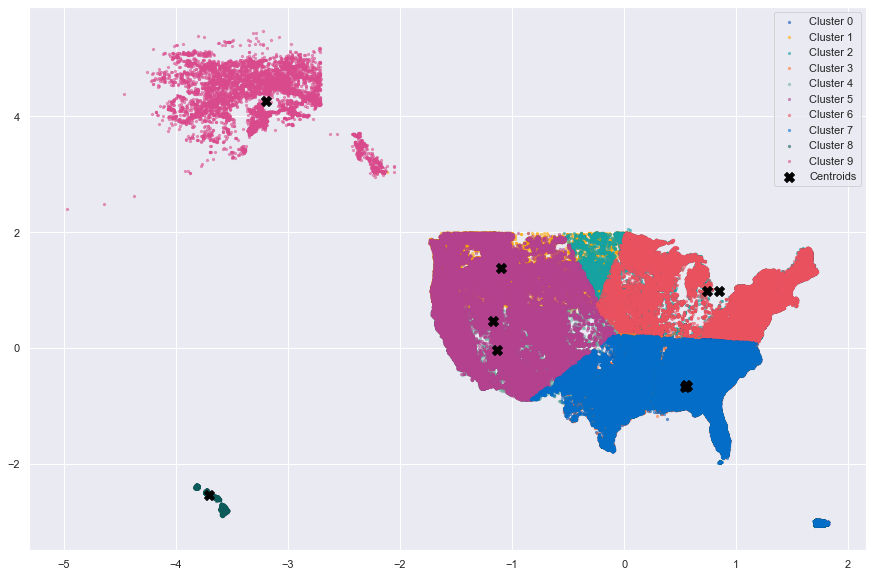

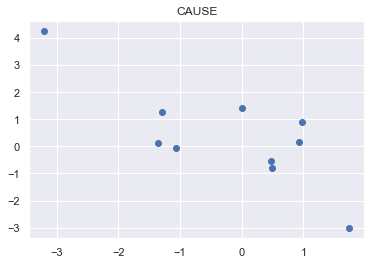

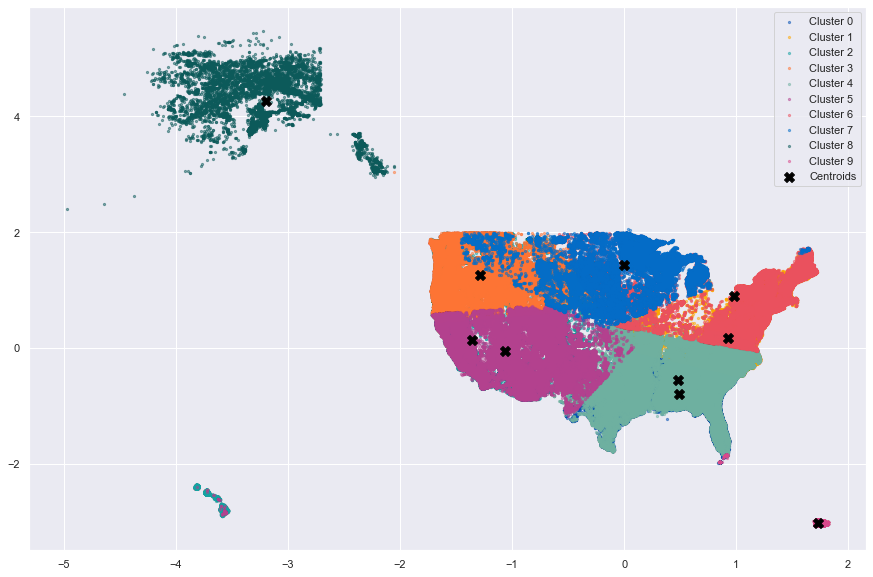

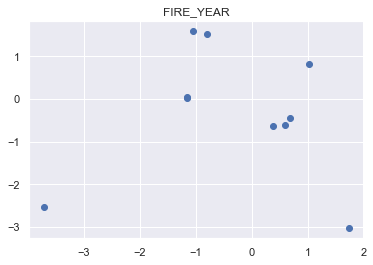

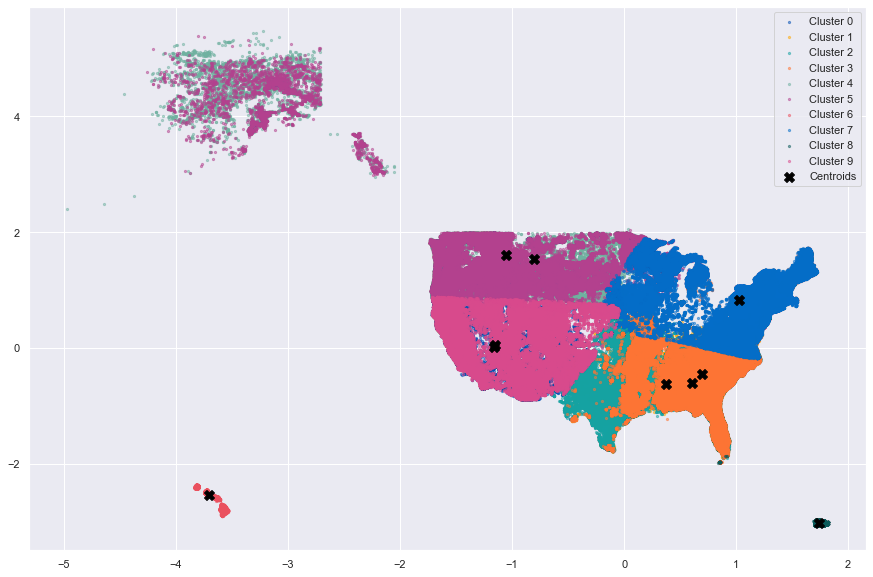

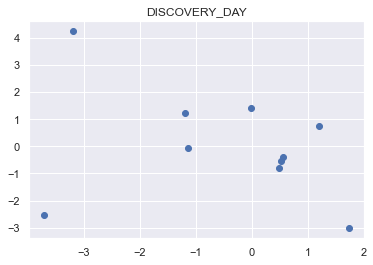

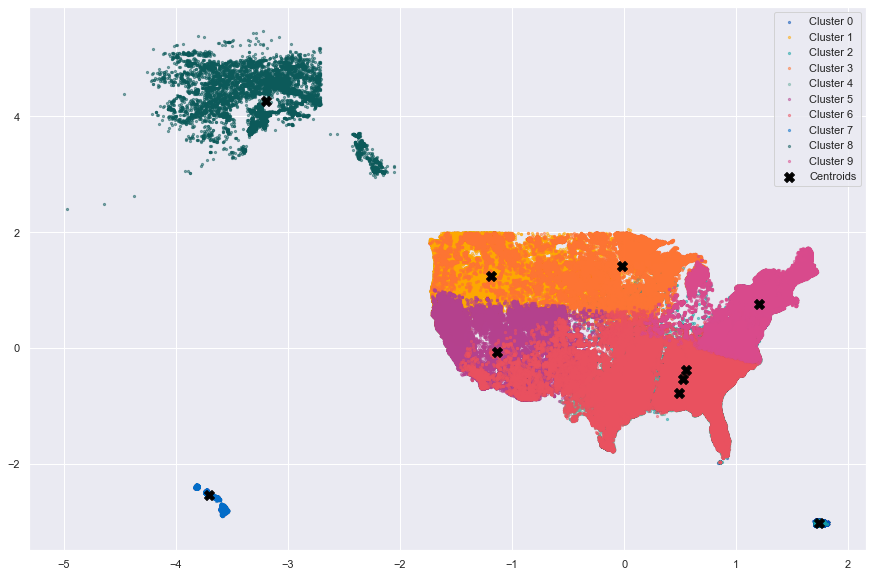

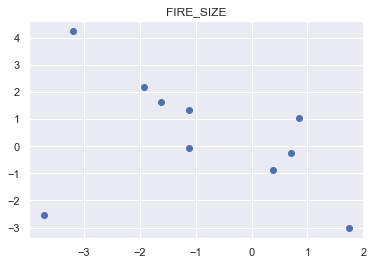

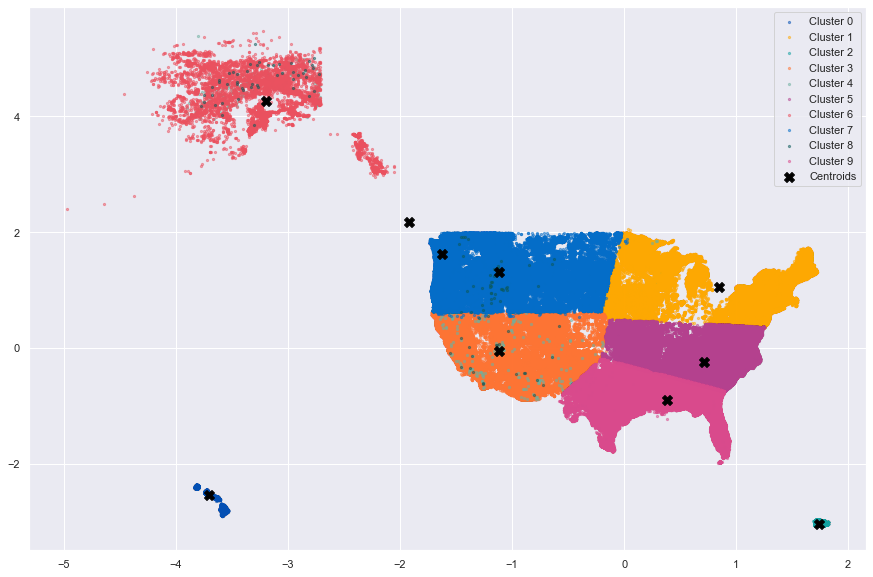

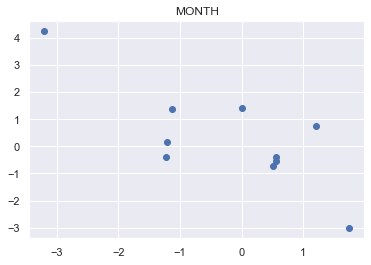

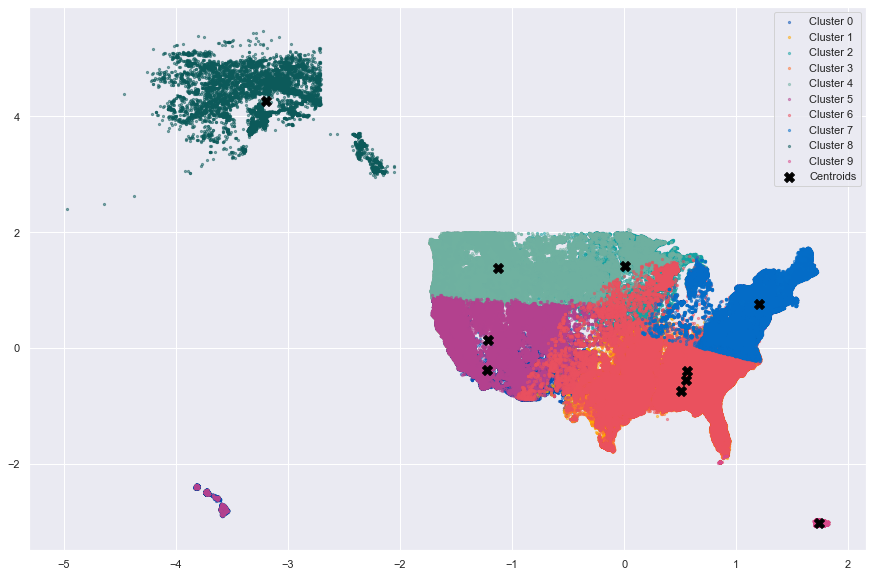

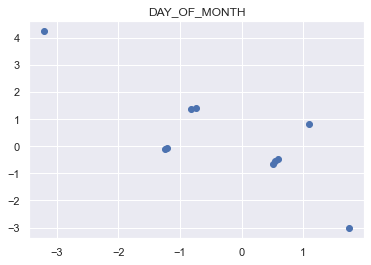

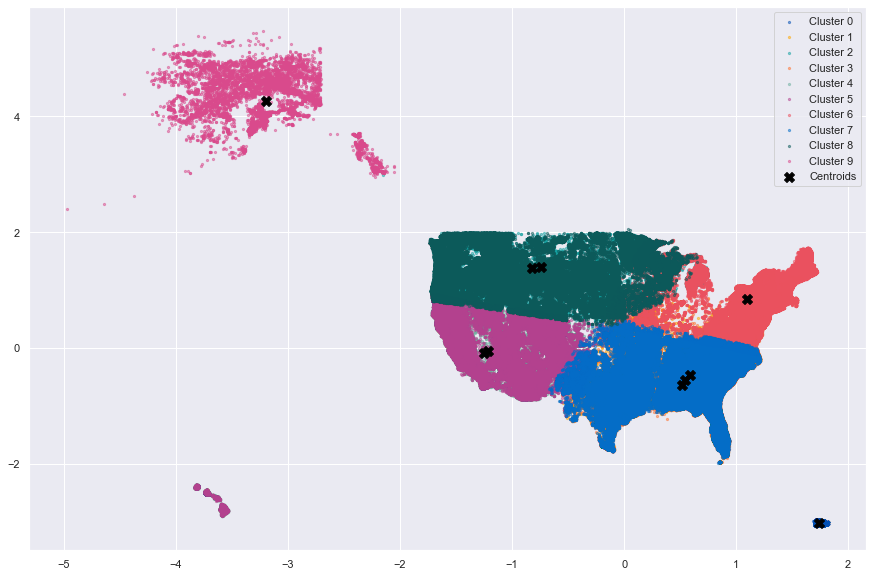

In [ ]:
# Pour mémoire : time > 13 min.
model_kmeans2(fires_k_model.columns)

### K-Means avec 5 clusters et 4 variables

In [ ]:
def model_kmeans3(dataframe) :
        for col in fires_k_model :
                fires_model_for_kmeans3 = fires_model[['LONGITUDE', 'LATITUDE', 'FIRE_SIZE_CLASS', col]]

                # Standardisation des données
                sc = StandardScaler()
                fires_model_norm3 = sc.fit_transform(fires_model_for_kmeans3)

                # Création DF
                fires_model_norm_kmeans3 = pd.DataFrame(fires_model_norm3, columns=['LONGITUDE','LATITUDE','FIRE_SIZE_CLASS', col])

                # Création de l'instance KMeans
                kmeans3 = KMeans(n_clusters=5)
                kmeans3.fit(fires_model_norm_kmeans3)
                y_kmeans3 = kmeans3.predict(fires_model_norm_kmeans3)

                # vecteur qui contient le numéro du groupe de chacune des données
                labels3 = kmeans3.labels_ 

                # Coordonnées des clusters / liste des positions des K centroïdes
                centroids3 = kmeans3.cluster_centers_

                # Graphique des centroïdes
                plt.scatter(centroids3[:, 0],centroids3[:, 1])
                plt.title(col)
                plt.show()

                # Représentation graphique K-means
                plt.figure(figsize=(10, 8))

                plt.scatter(fires_model_norm_kmeans3[y_kmeans3==0].iloc[:,0], fires_model_norm_kmeans3[y_kmeans3==0].iloc[:,1], s=5, alpha=0.5, c='#0450B4', label='Cluster 0')

                plt.scatter(fires_model_norm_kmeans3[y_kmeans3==1].iloc[:,0], fires_model_norm_kmeans3[y_kmeans3==1].iloc[:,1], s=5, alpha=0.5, c='#FEA802', label='Cluster 1')

                plt.scatter(fires_model_norm_kmeans3[y_kmeans3==2].iloc[:,0], fires_model_norm_kmeans3[y_kmeans3==2].iloc[:,1], s=5, alpha=0.5, c='#15A2A2', label='Cluster 2')

                plt.scatter(fires_model_norm_kmeans3[y_kmeans3==3].iloc[:,0], fires_model_norm_kmeans3[y_kmeans3==3].iloc[:,1], s=5, alpha=0.5, c='#FE7434', label='Cluster 3')

                plt.scatter(fires_model_norm_kmeans3[y_kmeans3==4].iloc[:,0], fires_model_norm_kmeans3[y_kmeans3==4].iloc[:,1], s=5, alpha=0.5, c='#6FB1A0', label='Cluster 4')


                plt.scatter(centroids3[:, 0],centroids3[:, 1], s=100, c='black', label='Centroids', marker='X')

                plt.legend(loc='best')
                plt.show()

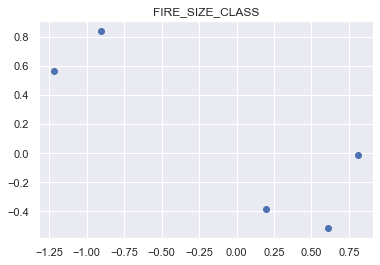

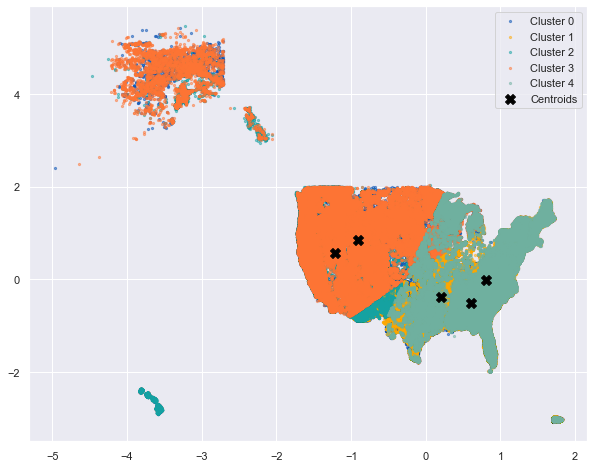

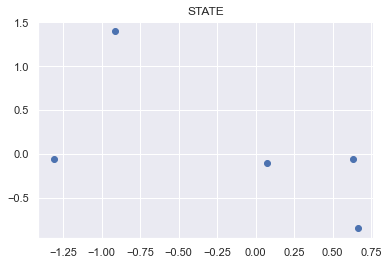

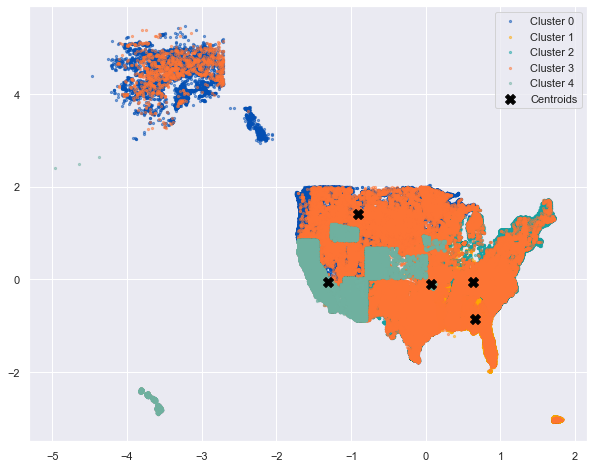

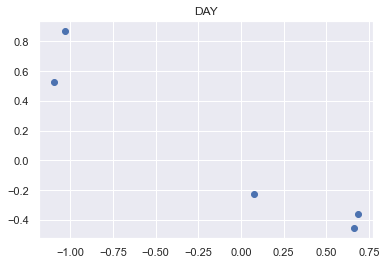

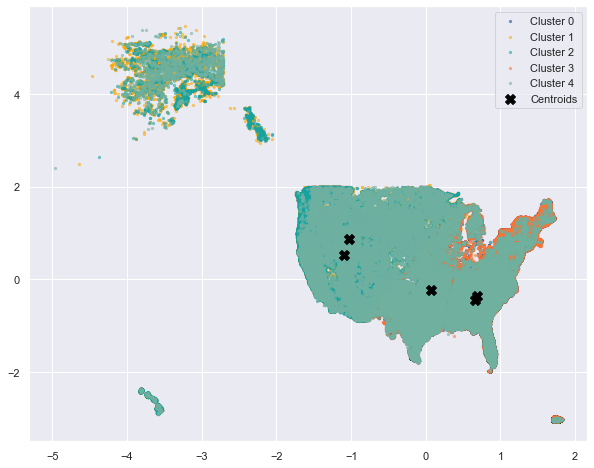

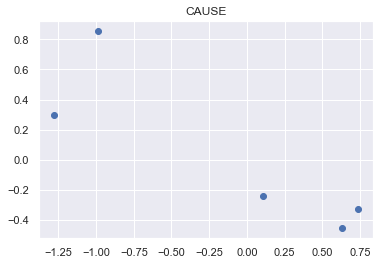

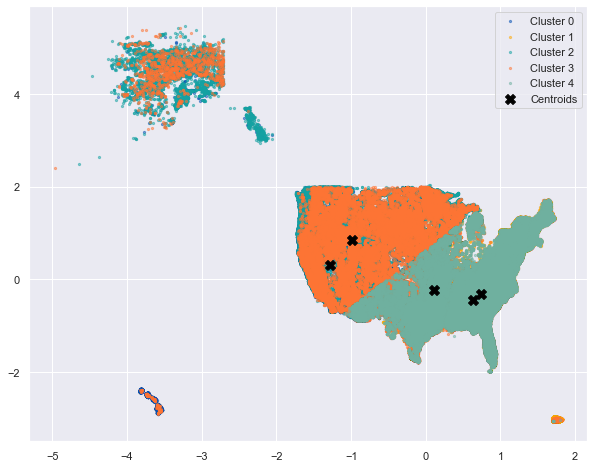

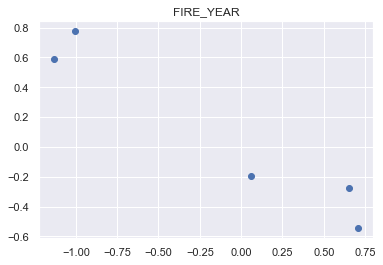

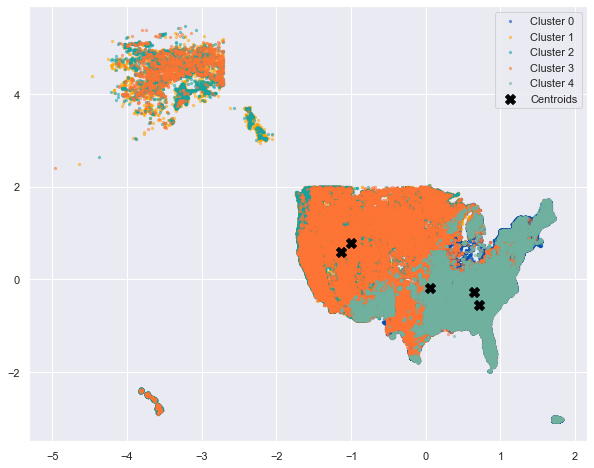

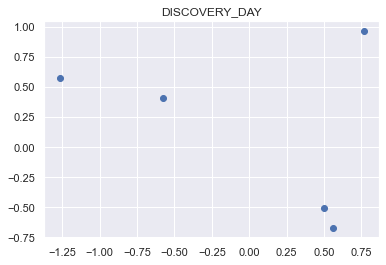

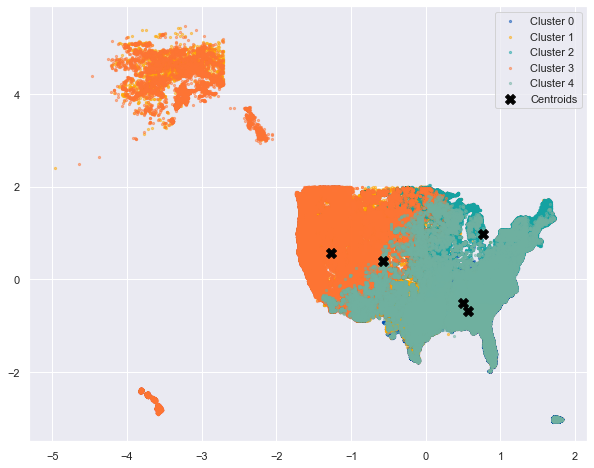

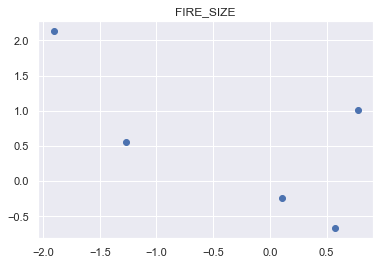

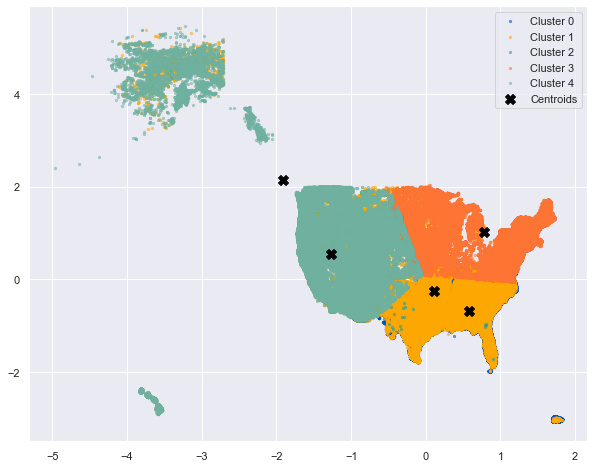

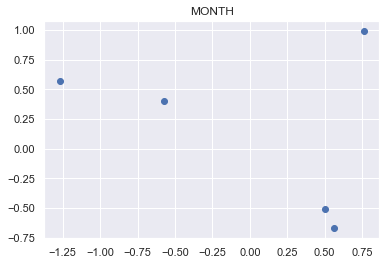

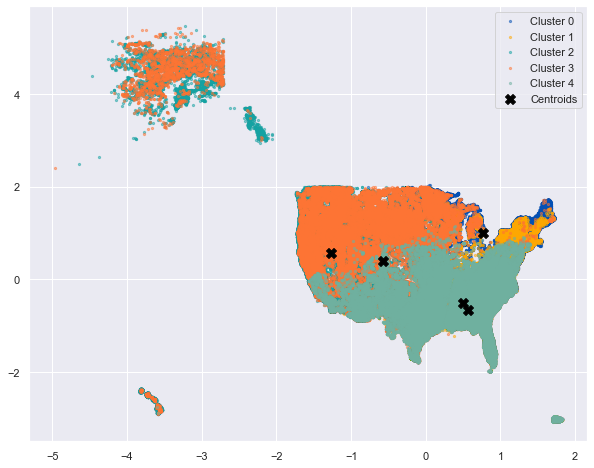

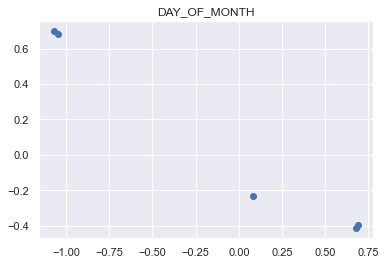

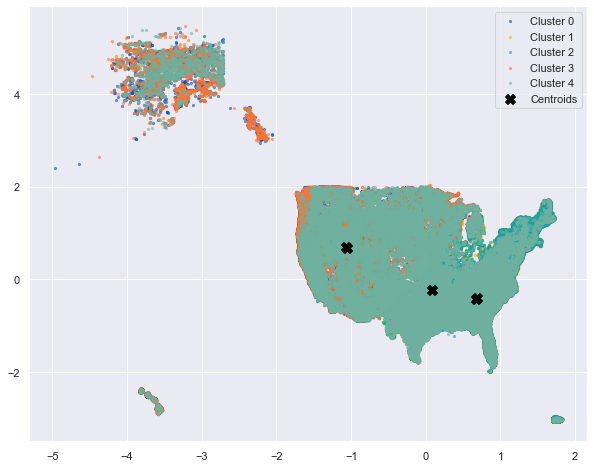

In [ ]:
# Pour mémoire : time > 10min.
model_kmeans3(fires_k_model)

### K-Means avec 2 clusters et 4 variables

In [ ]:
def model_kmeans4(dataframe) :
        for col in fires_k_model :
                fires_model_for_kmeans4 = fires_model[['LONGITUDE', 'LATITUDE', 'FIRE_SIZE_CLASS', col]]

                # Standardisation des données
                sc = StandardScaler()
                fires_model_norm4 = sc.fit_transform(fires_model_for_kmeans4)

                # Création DF
                fires_model_norm_kmeans4 = pd.DataFrame(fires_model_norm4, columns=['LONGITUDE','LATITUDE','FIRE_SIZE_CLASS', col])

                # Création de l'instance KMeans
                kmeans4 = KMeans(n_clusters=2)
                kmeans4.fit(fires_model_norm_kmeans4)
                y_kmeans4 = kmeans4.predict(fires_model_norm_kmeans4)

                # vecteur qui contient le numéro du groupe de chacune des données
                labels4 = kmeans4.labels_ 

                # Coordonnées des clusters / liste des positions des K centroïdes
                centroids4 = kmeans4.cluster_centers_

                # Graphique des centroïdes
                plt.scatter(centroids4[:, 0],centroids4[:, 1])
                plt.title(col)
                plt.show()

                # Représentation graphique K-means
                plt.figure(figsize=(10, 8))

                plt.scatter(fires_model_norm_kmeans4[y_kmeans4==0].iloc[:,0], fires_model_norm_kmeans4[y_kmeans4==0].iloc[:,1],
                        s=5, c='#0450B4', alpha=0.5, label='Cluster 0')

                plt.scatter(fires_model_norm_kmeans4[y_kmeans4==1].iloc[:,0], fires_model_norm_kmeans4[y_kmeans4==1].iloc[:,1],
                        s=5, c='#FEA802', alpha=0.5, label='Cluster 1')


                plt.scatter(centroids4[:, 0],centroids4[:, 1], s=100, c='black', label='Centroids', marker='X')

                plt.legend(loc='best')
                plt.show()

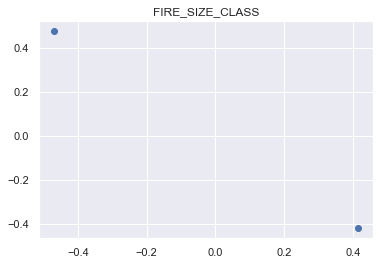

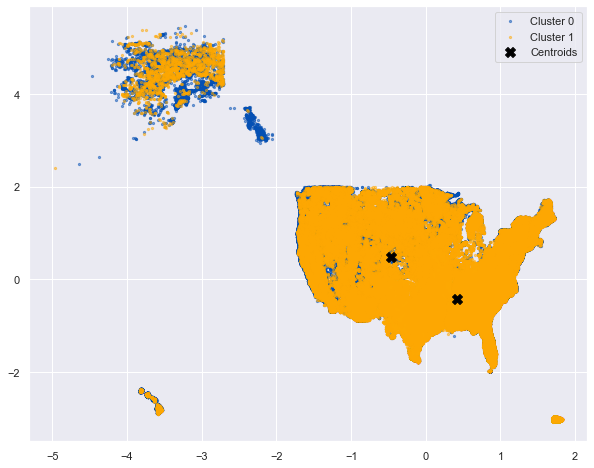

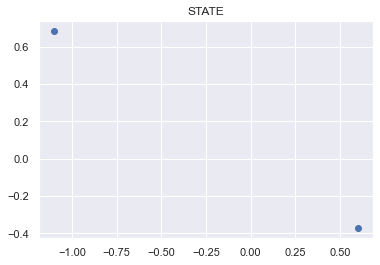

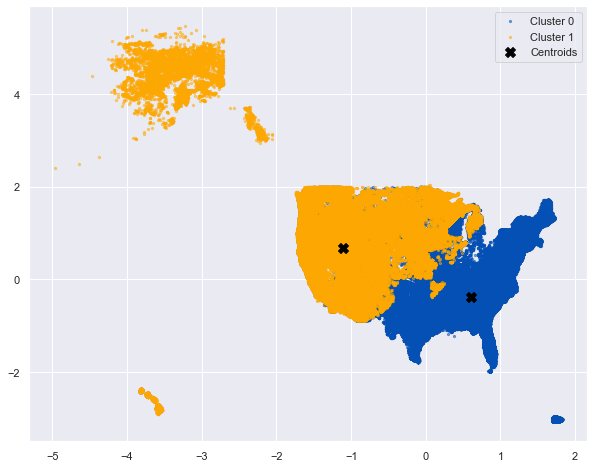

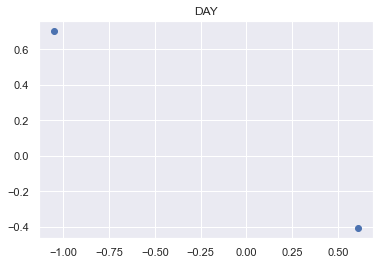

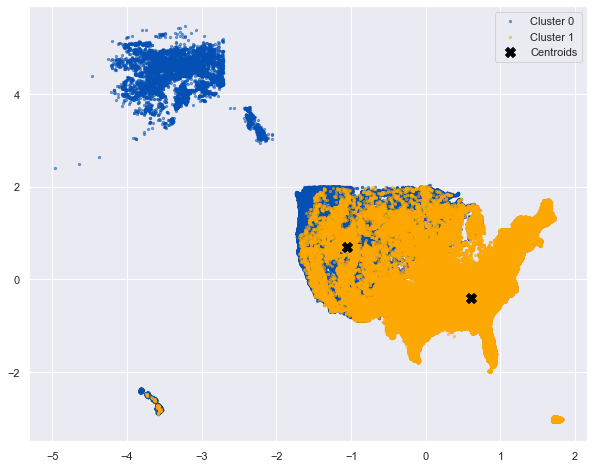

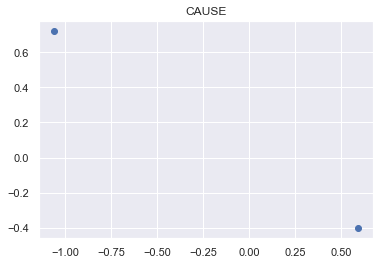

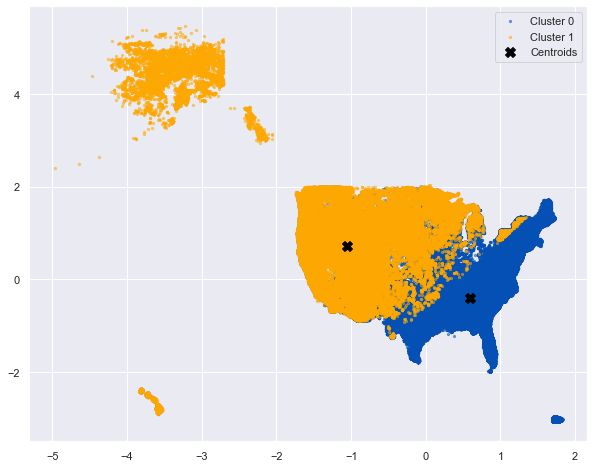

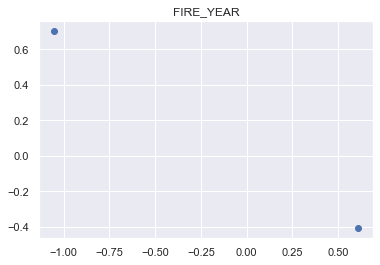

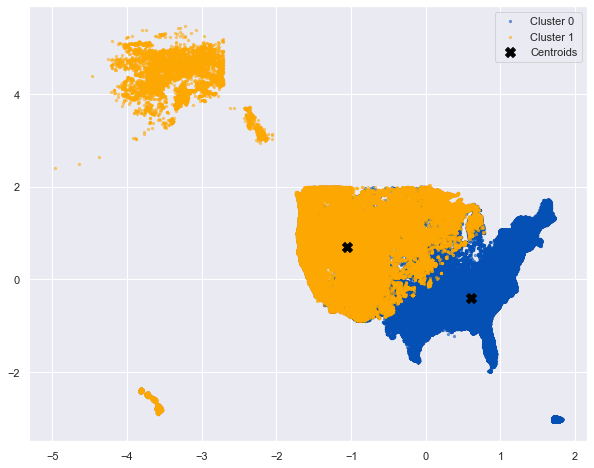

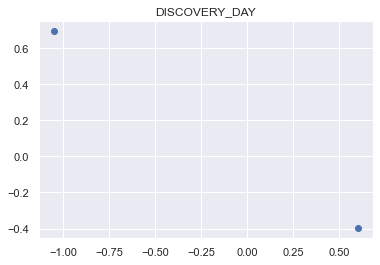

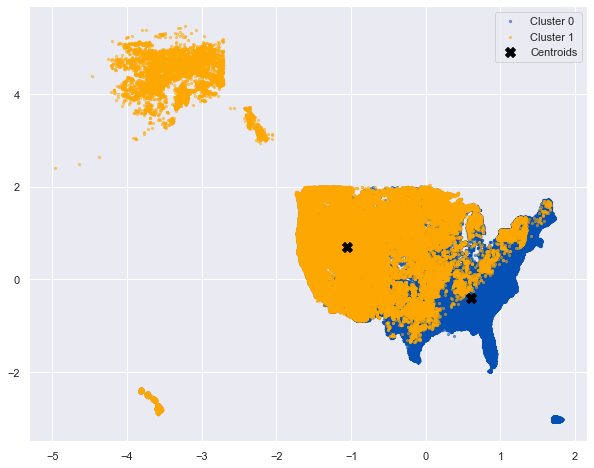

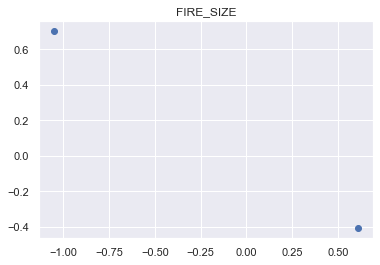

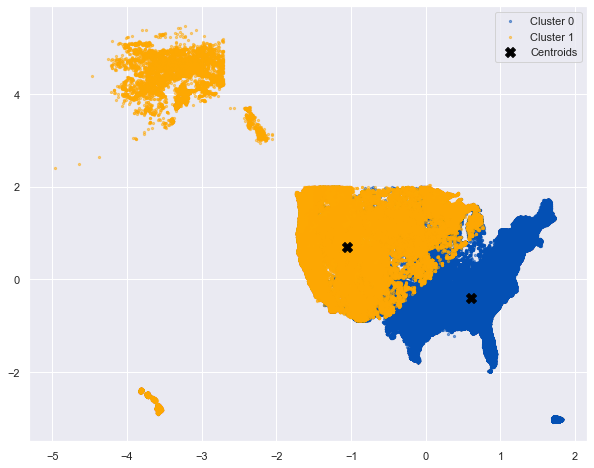

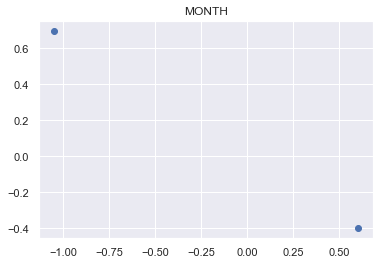

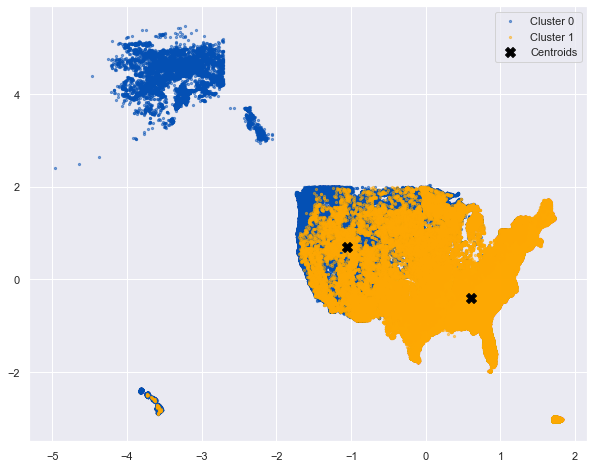

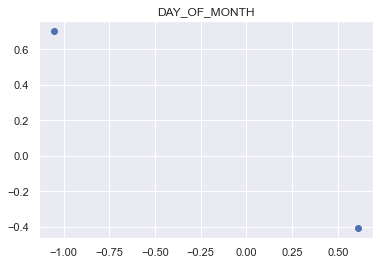

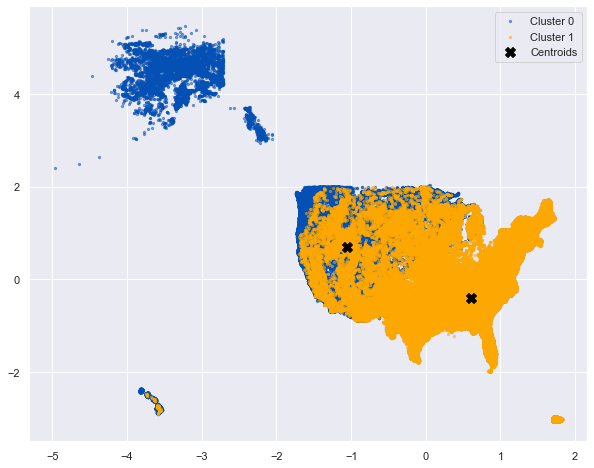

In [ ]:
# Pour mémoire : time > 4min.
model_kmeans4(fires_k_model)